In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import zscore
from scipy.stats.mstats import winsorize
import warnings

title_style = {'family': 'Century Gothic', 'color': 'darkred', 'size': 20 }
axis_style  = {'family': 'Century Gothic', 'color': 'darkblue', 'size': 15 }
baslik_font = {'family': 'arial', 'color': 'darkred','weight': 'bold','size': 13 }
eksen_font  = {'family': 'arial', 'color': 'darkblue','weight': 'bold','size': 10 }

warnings.filterwarnings("ignore")

In [23]:
sp = pd.read_csv("C:/Users/ozkan/datas/StudentsPerformance.csv")

In [24]:
df = sp.copy()
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [68]:
print("--"*500)

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

## Soru: 1 Sınavlardaki performans cinsiyete, kökene ve anne-baba eğitim durumuna göre değişiklik göstermekte midir?

In [7]:
df.groupby("gender").mean()

,math score,reading score,writing score
gender,,,
female,63.633205,72.608108,72.467181
male,68.728216,65.473029,63.311203


In [12]:
df.groupby("gender").describe()

math score                                                       \
            count       mean        std   min   25%   50%   75%    max   
gender                                                                   
female      518.0  63.633205  15.491453   0.0  54.0  65.0  74.0  100.0   
male        482.0  68.728216  14.356277  27.0  59.0  69.0  79.0  100.0   

       reading score             ...              writing score             \
               count       mean  ...   75%    max         count       mean   
gender                           ...                                         
female         518.0  72.608108  ...  83.0  100.0         518.0  72.467181   
male           482.0  65.473029  ...  75.0  100.0         482.0  63.311203   

                                                   
              std   min   25%   50%    75%    max  
gender                                             
female  14.844842  10.0  64.0  74.0  82.00  100.0  
male    14.113832  15.0  53.0  64.0  73.75  100.0  

[2 rows x 24 columns]

In [8]:
df.groupby("race/ethnicity").mean()

,math score,reading score,writing score
race/ethnicity,,,
group A,61.629213,64.674157,62.674157
group B,63.452632,67.352632,65.600000
group C,64.463950,69.103448,67.827586
group D,67.362595,70.030534,70.145038
group E,73.821429,73.028571,71.407143


In [13]:
df.groupby("race/ethnicity").describe()

math score                                                 \
                    count       mean        std   min    25%   50%   75%   
race/ethnicity                                                             
group A              89.0  61.629213  14.523008  28.0  51.00  61.0  71.0   
group B             190.0  63.452632  15.468191   8.0  54.00  63.0  74.0   
group C             319.0  64.463950  14.852666   0.0  55.00  65.0  74.0   
group D             262.0  67.362595  13.769386  26.0  59.00  69.0  77.0   
group E             140.0  73.821429  15.534259  30.0  64.75  74.5  85.0   

                      reading score             ...                \
                  max         count       mean  ...    75%    max   
race/ethnicity                                  ...                 
group A         100.0          89.0  64.674157  ...  74.00  100.0   
group B          97.0         190.0  67.352632  ...  79.75   97.0   
group C          98.0         319.0  69.103448  ...  78.50  100.0   
group D         100.0         262.0  70.030534  ...  79.00  100.0   
group E         100.0         140.0  73.028571  ...  84.00  100.0   

               writing score                                                  \
                       count       mean        std   min    25%   50%    75%   
race/ethnicity                                                                 
group A                 89.0  62.674157  15.468278  19.0  51.00  62.0  73.00   
group B                190.0  65.600000  15.625173  15.0  55.25  67.0  78.00   
group C                319.0  67.827586  14.983378  10.0  57.00  68.0  79.00   
group D                262.0  70.145038  14.367707  32.0  61.00  72.0  80.00   
group E                140.0  71.407143  15.113906  22.0  62.00  72.0  80.25   

                       
                  max  
race/ethnicity         
group A          97.0  
group B          96.0  
group C         100.0  
group D         100.0  
group E         100.0  

[5 rows x 24 columns]

In [14]:
df.groupby("parental level of education").describe()

math score                                     \
                                 count       mean        std   min    25%   
parental level of education                                                 
associate's degree               222.0  67.882883  15.112093  26.0  57.00   
bachelor's degree                118.0  69.389831  14.943789  29.0  61.00   
high school                      196.0  62.137755  14.539651   8.0  53.75   
master's degree                   59.0  69.745763  15.153915  40.0  55.50   
some college                     226.0  67.128319  14.312897  19.0  59.00   
some high school                 179.0  63.497207  15.927989   0.0  53.00   

                                               reading score             ...  \
                              50%   75%    max         count       mean  ...   
parental level of education                                              ...   
associate's degree           67.0  80.0  100.0         222.0  70.927928  ...   
bachelor's degree            68.0  79.0  100.0         118.0  73.000000  ...   
high school                  63.0  72.0   99.0         196.0  64.704082  ...   
master's degree              73.0  81.0   95.0          59.0  75.372881  ...   
some college                 67.5  76.0  100.0         226.0  69.460177  ...   
some high school             65.0  74.0   97.0         179.0  66.938547  ...   

                                          writing score                        \
                               75%    max         count       mean        std   
parental level of education                                                     
associate's degree           81.00  100.0         222.0  69.896396  14.311122   
bachelor's degree            82.75  100.0         118.0  73.381356  14.728262   
high school                  74.25   99.0         196.0  62.448980  14.085907   
master's degree              84.50  100.0          59.0  75.677966  13.730711   
some college                 79.75  100.0         226.0  68.840708  15.012331   
some high school             79.00  100.0         179.0  64.888268  15.736197   

                                                            
                              min   25%   50%   75%    max  
parental level of education                                 
associate's degree           35.0  58.0  70.5  80.0  100.0  
bachelor's degree            38.0  62.5  74.0  83.0  100.0  
high school                  15.0  52.0  64.0  73.0  100.0  
master's degree              46.0  67.0  75.0  85.0  100.0  
some college                 19.0  60.0  70.0  79.0   99.0  
some high school             10.0  54.0  66.0  77.0  100.0  

[6 rows x 24 columns]

In [9]:
df.groupby("parental level of education").mean()

,math score,reading score,writing score
parental level of education,,,
associate's degree,67.882883,70.927928,69.896396
bachelor's degree,69.389831,73.000000,73.381356
high school,62.137755,64.704082,62.448980
master's degree,69.745763,75.372881,75.677966
some college,67.128319,69.460177,68.840708
some high school,63.497207,66.938547,64.888268


In [25]:
variables = ["math score","reading score","writing score"]

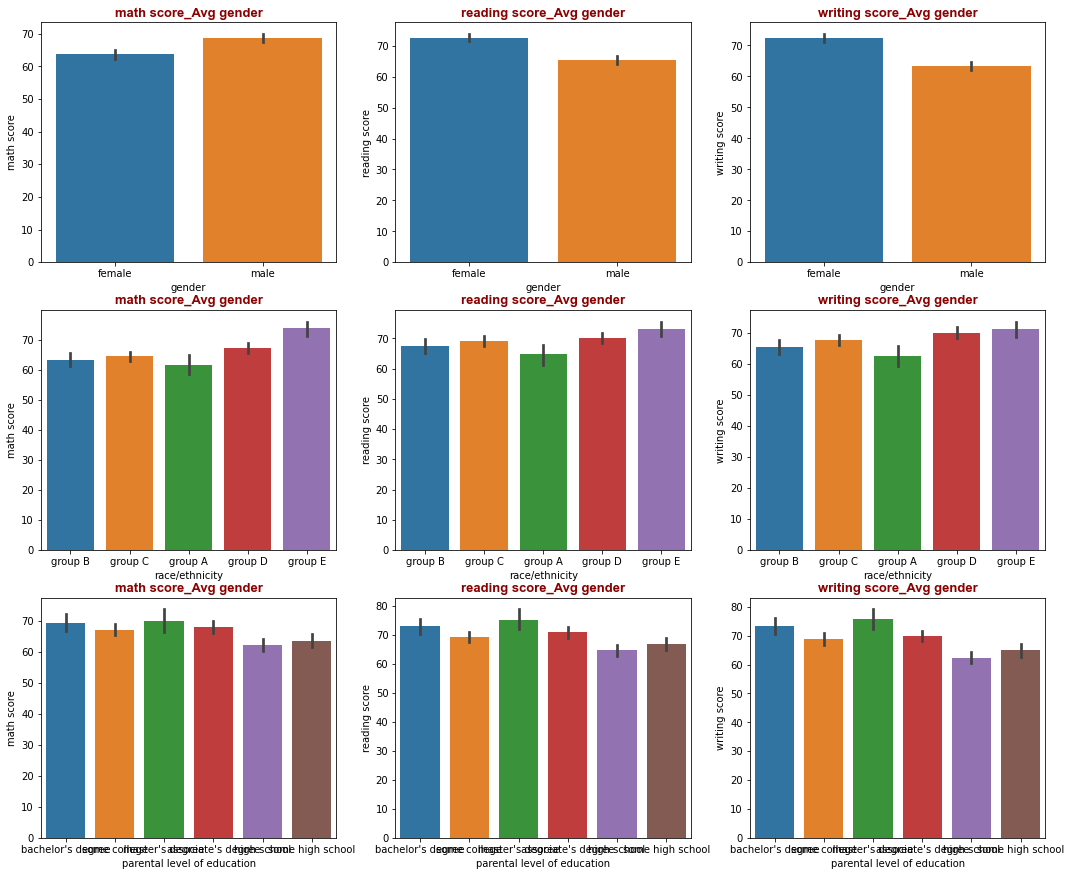

In [49]:
plt.figure(figsize=(18,15))

for i in range(3):
    plt.subplot(3,3,i+1)
    sns.barplot(df["gender"], df[variables[i]])
    plt.title(variables[i] + "_Avg gender" , fontdict = baslik_font)

for i in range(3):
    plt.subplot(3,3,i+4)
    sns.barplot(df["race/ethnicity"], df[variables[i]])
    plt.title(variables[i] + "_Avg gender" , fontdict = baslik_font) 

for i in range(3):
    plt.subplot(3,3,i+7)
    sns.barplot(df["parental level of education"], df[variables[i]])
    plt.title(variables[i] + "_Avg gender" , fontdict = baslik_font)

Görsel olarak pek fazla fark olmadığı gözükmektedir. İstatistiksel olarak farklı olup olmadıklarına bakabiliriz.

In [51]:
# Test whether group differences are significant.
dereceler = df["gender"].unique()
grup_df = df.groupby("gender")

In [52]:
pd.options.display.float_format = '{:.15f}'.format
for var in ["math score","reading score","writing score"]:
    karsilastirma = pd.DataFrame(columns=['grup_1', 'grup_2','istatistik', 'p_degeri'])
    print("{} için karşılaştırma".format(var),end='')
    for i in range(0, len(dereceler)):
        for j in range(i+1, len(dereceler)):
            ttest = stats.ttest_ind(df[df["gender"]==dereceler[i]][var], 
                                df[df["gender"]==dereceler[j]][var])
            grup_1 = dereceler[i]
            grup_2 = dereceler[j]
            istatistik = ttest[0]
            p_degeri = ttest[1]
            
            karsilastirma = karsilastirma.append({"grup_1" : grup_1 ,
                                                  "grup_2" : grup_2 ,
                                                  "istatistik": istatistik , 
                                                  "p_degeri" : p_degeri}, ignore_index=True)
    display(karsilastirma)

math score için karşılaştırma

,grup_1,grup_2,istatistik,p_degeri
0,female,male,-5.383245869828983,0.000000091201855


reading score için karşılaştırma

,grup_1,grup_2,istatistik,p_degeri
0,female,male,7.959308005187657,0.000000000000005


writing score için karşılaştırma

,grup_1,grup_2,istatistik,p_degeri
0,female,male,9.979557910004507,0.000000000000000


In [53]:
# Test whether group differences are significant.
dereceler = df["race/ethnicity"].unique()
grup_df = df.groupby("race/ethnicity")

In [54]:
pd.options.display.float_format = '{:.15f}'.format
for var in ["math score","reading score","writing score"]:
    karsilastirma = pd.DataFrame(columns=['grup_1', 'grup_2','istatistik', 'p_degeri'])
    print("{} için karşılaştırma".format(var),end='')
    for i in range(0, len(dereceler)):
        for j in range(i+1, len(dereceler)):
            ttest = stats.ttest_ind(df[df["race/ethnicity"]==dereceler[i]][var], 
                                df[df["race/ethnicity"]==dereceler[j]][var])
            grup_1 = dereceler[i]
            grup_2 = dereceler[j]
            istatistik = ttest[0]
            p_degeri = ttest[1]
            
            karsilastirma = karsilastirma.append({"grup_1" : grup_1 ,
                                                  "grup_2" : grup_2 ,
                                                  "istatistik": istatistik , 
                                                  "p_degeri" : p_degeri}, ignore_index=True)
    display(karsilastirma)

math score için karşılaştırma

,grup_1,grup_2,istatistik,p_degeri
0,group B,group C,-0.731566989353426,0.464770893916745
1,group B,group A,0.935507627974749,0.350341596165996
2,group B,group D,-2.828455397126750,0.004886197137104
3,group B,group E,-6.007397050552227,0.000000005007946
4,group C,group A,1.599722030321730,0.110438107455880
5,group C,group D,-2.418586247460110,0.015888349556016
6,group C,group E,-6.127642520822135,0.000000001927239
7,group A,group D,-3.346698242971230,0.000906863605354
8,group A,group E,-5.936141025544798,0.000000010835591
9,group D,group E,-4.282287214674715,0.000023187640327


reading score için karşılaştırma

,grup_1,grup_2,istatistik,p_degeri
0,group B,group C,-1.322315621290177,0.186659280903507
1,group B,group A,1.363368226202768,0.173873551344372
2,group B,group D,-1.945156363686479,0.052378620655970
3,group B,group E,-3.386066945409153,0.000795161849524
4,group C,group A,2.575432218066352,0.010364398025471
5,group C,group D,-0.797010931640892,0.425771382113019
6,group C,group E,-2.713301864537168,0.006913284280499
7,group A,group D,-3.046854857346119,0.002488654464332
8,group A,group E,-4.071106227981414,0.000064633959318
9,group D,group E,-2.010647940603179,0.045033306431346


writing score için karşılaştırma

,grup_1,grup_2,istatistik,p_degeri
0,group B,group C,-1.596496343374041,0.111001095981452
1,group B,group A,1.462442057799811,0.144753741989939
2,group B,group D,-3.199293332325260,0.001474997888132
3,group B,group E,-3.383197834524452,0.000803230048635
4,group C,group A,2.848872404992454,0.004610690740740
5,group C,group D,-1.889663151672625,0.059302329187082
6,group C,group E,-2.350281186835918,0.019183539018898
7,group A,group D,-4.155631636144919,0.000040848057340
8,group A,group E,-4.223473663197010,0.000034832780645
9,group D,group E,-0.823973657152092,0.410445551739226


Grup B ve Grup C genel olarak birbirlerinden istatistiksel farklı olduğu ortaya çıkar.

In [56]:
# Test whether group differences are significant.
dereceler = df["parental level of education"].unique()
grup_df = df.groupby("parental level of education")

In [57]:
pd.options.display.float_format = '{:.15f}'.format
for var in ["math score","reading score","writing score"]:
    karsilastirma = pd.DataFrame(columns=['grup_1', 'grup_2','istatistik', 'p_degeri'])
    print("{} için karşılaştırma".format(var),end='')
    for i in range(0, len(dereceler)):
        for j in range(i+1, len(dereceler)):
            ttest = stats.ttest_ind(df[df["parental level of education"]==dereceler[i]][var], 
                                df[df["parental level of education"]==dereceler[j]][var])
            grup_1 = dereceler[i]
            grup_2 = dereceler[j]
            istatistik = ttest[0]
            p_degeri = ttest[1]
            
            karsilastirma = karsilastirma.append({"grup_1" : grup_1 ,
                                                  "grup_2" : grup_2 ,
                                                  "istatistik": istatistik , 
                                                  "p_degeri" : p_degeri}, ignore_index=True)
    display(karsilastirma)

math score için karşılaştırma

,grup_1,grup_2,istatistik,p_degeri
0,bachelor's degree,some college,1.370235282961748,0.171512242184716
1,bachelor's degree,master's degree,-0.148681965688493,0.881975782486770
2,bachelor's degree,associate's degree,0.878664188979324,0.380207578180362
3,bachelor's degree,high school,4.236143622484822,0.000029965345854
4,bachelor's degree,some high school,3.196718602676573,0.001540919292281
5,some college,master's degree,-1.235633421582457,0.217619568103474
6,some college,associate's degree,-0.542684269624753,0.587618280923407
7,some college,high school,3.546107949568116,0.000434980041925
8,some college,some high school,2.411704623140763,0.016324361572646
9,master's degree,associate's degree,0.841122968856347,0.400999363612466


reading score için karşılaştırma

,grup_1,grup_2,istatistik,p_degeri
0,bachelor's degree,some college,2.204882120908508,0.028127555314401
1,bachelor's degree,master's degree,-1.054085894947598,0.293296751317879
2,bachelor's degree,associate's degree,1.297796985045283,0.195242064830911
3,bachelor's degree,high school,5.017577900835298,0.000000880425031
4,bachelor's degree,some high school,3.403927067379874,0.000756197171973
5,some college,master's degree,-2.888843374950649,0.004165440800640
6,some college,associate's degree,-1.112318821691490,0.266600285399801
7,some college,high school,3.457842768362033,0.000600104848125
8,some college,some high school,1.714161972758909,0.087267868562439
9,master's degree,associate's degree,2.191201575983869,0.029264145709722


writing score için karşılaştırma

,grup_1,grup_2,istatistik,p_degeri
0,bachelor's degree,some college,2.680331468463220,0.007711012023673
1,bachelor's degree,master's degree,-0.999874130680484,0.318751964146466
2,bachelor's degree,associate's degree,2.115929663913376,0.035081624517197
3,bachelor's degree,high school,6.547380937127048,0.000000000240763
4,bachelor's degree,some high school,4.667733097498242,0.000004628198527
5,some college,master's degree,-3.168769063239491,0.001698593313596
6,some college,associate's degree,-0.761596864395391,0.446703166030366
7,some college,high school,4.488520877492127,0.000009275017803
8,some college,some high school,2.575721140379242,0.010358529086081
9,master's degree,associate's degree,2.781241549068550,0.005784032705258


İstatisksel oalrak farklı çıkanlar vardır. Örneğin Math score için bachelor's degree ve master's degree

In [69]:
print("--"*500)

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

## Soru:2 Öğle yemek tipinin sınav performansları ile bir ilişkisi var mı? Varsa bunu nasıl açıklayabilirsiniz?

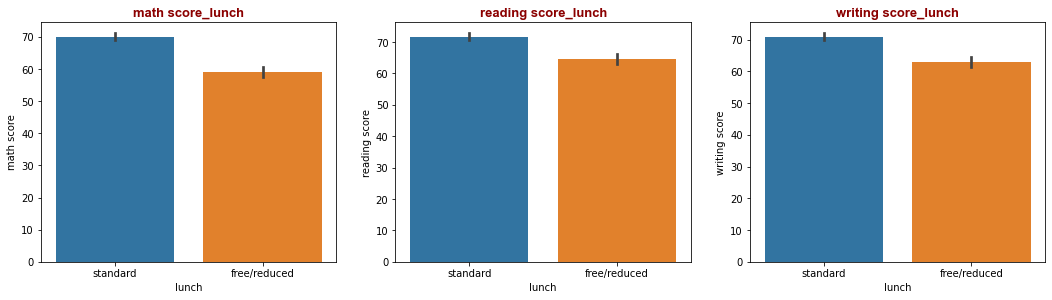

In [63]:
plt.figure(figsize=(18,15))

for i in range(3):
    plt.subplot(3,3,i+1)
    sns.barplot(df["lunch"], df[variables[i]])
    plt.title(variables[i] + "_lunch" , fontdict = baslik_font)

In [59]:
# Test whether group differences are significant.
dereceler = df["lunch"].unique()
grup_df = df.groupby("lunch")

In [61]:
pd.options.display.float_format = '{:.15f}'.format
for var in ["math score","reading score","writing score"]:
    karsilastirma = pd.DataFrame(columns=['grup_1', 'grup_2','istatistik', 'p_degeri'])
    print("{} için karşılaştırma".format(var),end='')
    for i in range(0, len(dereceler)):
        for j in range(i+1, len(dereceler)):
            ttest = stats.ttest_ind(df[df["lunch"]==dereceler[i]][var], 
                                df[df["lunch"]==dereceler[j]][var])
            grup_1 = dereceler[i]
            grup_2 = dereceler[j]
            istatistik = ttest[0]
            p_degeri = ttest[1]
            
            karsilastirma = karsilastirma.append({"grup_1" : grup_1 ,
                                                  "grup_2" : grup_2 ,
                                                  "istatistik": istatistik , 
                                                  "p_degeri" : p_degeri}, ignore_index=True)
    display(karsilastirma)

math score için karşılaştırma

,grup_1,grup_2,istatistik,p_degeri
0,standard,free/reduced,11.837180472914612,0.000000000000000


reading score için karşılaştırma

,grup_1,grup_2,istatistik,p_degeri
0,standard,free/reduced,7.451056467473455,0.000000000000200


writing score için karşılaştırma

,grup_1,grup_2,istatistik,p_degeri
0,standard,free/reduced,8.009784197834758,0.000000000000003


### Öğle yemek tipinin sınav performansları ile bir ilişkisi yoktur. Veriler istatistiksel olarak farklı değildir.

In [67]:
print("--"*500)

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

# Soru:3 Hazırlık kurslarının sonav performansı üzerinde bir etkisi var mı?

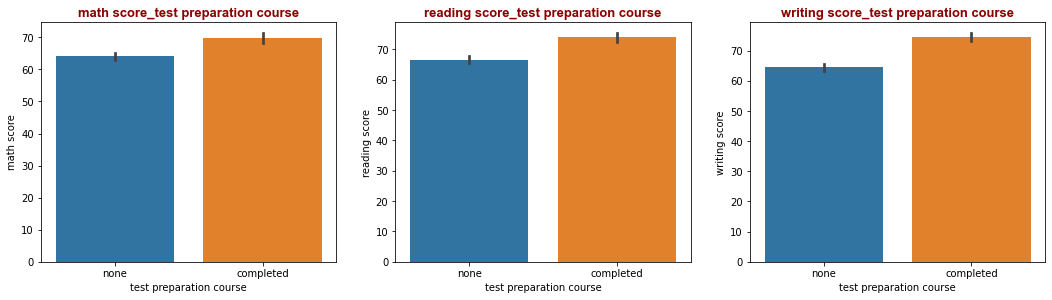

In [71]:
plt.figure(figsize=(18,15))

for i in range(3):
    plt.subplot(3,3,i+1)
    sns.barplot(df["test preparation course"], df[variables[i]])
    plt.title(variables[i] + "_test preparation course" , fontdict = baslik_font)

In [72]:
# Test whether group differences are significant.
dereceler = df["test preparation course"].unique()
grup_df = df.groupby("test preparation course")

In [73]:
pd.options.display.float_format = '{:.15f}'.format
for var in ["math score","reading score","writing score"]:
    karsilastirma = pd.DataFrame(columns=['grup_1', 'grup_2','istatistik', 'p_degeri'])
    print("{} için karşılaştırma".format(var),end='')
    for i in range(0, len(dereceler)):
        for j in range(i+1, len(dereceler)):
            ttest = stats.ttest_ind(df[df["test preparation course"]==dereceler[i]][var], 
                                df[df["test preparation course"]==dereceler[j]][var])
            grup_1 = dereceler[i]
            grup_2 = dereceler[j]
            istatistik = ttest[0]
            p_degeri = ttest[1]
            
            karsilastirma = karsilastirma.append({"grup_1" : grup_1 ,
                                                  "grup_2" : grup_2 ,
                                                  "istatistik": istatistik , 
                                                  "p_degeri" : p_degeri}, ignore_index=True)
    display(karsilastirma)

math score için karşılaştırma

,grup_1,grup_2,istatistik,p_degeri
0,none,completed,-5.704616417349102,0.000000015359135


reading score için karşılaştırma

,grup_1,grup_2,istatistik,p_degeri
0,none,completed,-7.871663538941468,0.000000000000009


writing score için karşılaştırma

,grup_1,grup_2,istatistik,p_degeri
0,none,completed,-10.409173436808748,0.000000000000000


## Hazırlık kurslarının sonav performansı üzerinde bir etkisi yok.

In [76]:
print("--"*500)

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

# Soru:4 Birbiriyle korelasyonu en fazla olan dersler hangisidir?

In [77]:
korelasyon_mat_df = df.corr()

Text(0.5, 1.0, 'Korelasyon Matrisi (Dersler)')

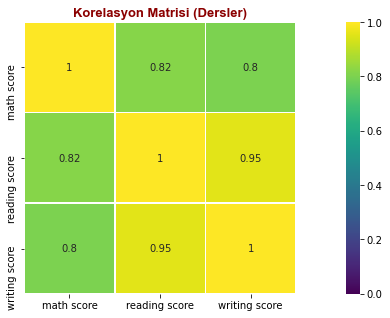

In [78]:
plt.figure(figsize=(18,5))

sns.heatmap(korelasyon_mat_df, square=True, annot=True, linewidths=.5, vmin=0, vmax=1, cmap='viridis')
plt.title("Korelasyon Matrisi (Dersler)", fontdict=baslik_font)

## Reading ve Writing